In [21]:
import numpy as np
import matplotlib.pyplot as plt
import cv2

In [22]:
nx = 256
ny = 256
x_max = 2 * np.pi 
y_max = 2 * np.pi
dx = x_max / nx
dy = y_max / ny
dt = 0.0
CFL = 0.7
x = np.arange(0.0, x_max, dx)
y = np.arange(0.0, y_max, dy)
X, Y = np.meshgrid(x, y)

gamma = 5.0/3.0

U = np.zeros([8, x.shape[0], y.shape[0]]) # rho, rho*u, rho*v, rho*w, Bx, By, Bz, e
# ここでのLとRはメインループ内のL・Rの意味とは違う
# ここのは左半分・右半分の意味
rho_init = gamma**2
u_init = -np.sin(Y).T
v_init = np.sin(X).T
w_init = 0.0
Bx_init = -np.sin(Y).T
By_init = np.sin(2*X).T
Bz_init = 0.0
p_init = gamma
U[0, :, :] = rho_init
U[1, :, :] = rho_init * u_init
U[2, :, :] = rho_init * v_init
U[3, :, :] = rho_init * w_init
U[4, :, :] = Bx_init
U[5, :, :] = By_init
U[6, :, :] = Bz_init
U[7, :, :] = p_init/(gamma-1) + rho_init * (u_init**2 + v_init**2 + w_init**2)/2 + (Bx_init**2 + By_init**2 + Bz_init**2)/2

F = np.zeros(U.shape)
F_bar = np.zeros(F.shape)
G = np.zeros(U.shape)
G_bar = np.zeros(G.shape)

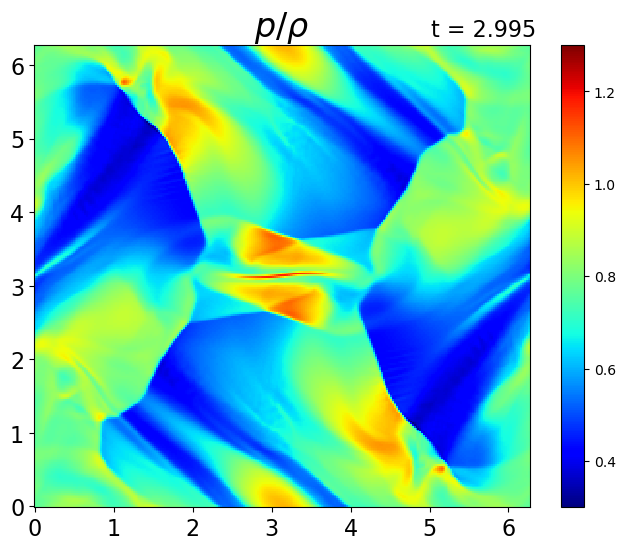

In [23]:
fig = plt.figure(figsize=(8, 6))
ax1 = fig.add_subplot(111)

log = np.loadtxt("log.txt", delimiter=',')
step = 1000
U = np.loadtxt(f"results/orszag_tang_{step}.txt", delimiter=',').reshape(8, nx, ny)
rho = U[0, :, :]
u = U[1, :, :] / rho
v = U[2, :, :] / rho
w = U[3, :, :] / rho
Bx = U[4, :, :]
By = U[5, :, :]
Bz = U[6, :, :]
e = U[7, :, :]
p = (gamma-1) * (e - rho*(u**2+v**2+w**2)/2 - (Bx**2+By**2+Bz**2)/2)
magnetic_pressure = 1/2 * (Bx**2+By**2+Bz**2)
pT = p + magnetic_pressure

contour = ax1.pcolormesh(X, Y, (p/rho).T, vmin=0.3, vmax=1.3, cmap='jet')
cbar = plt.colorbar(contour, ax=ax1)

ax1.set_title(r"$p/\rho$", fontsize=24)
ax1.text(0.8, 1.02, f"t = {log[int(step/10)][1]:.3f}", transform=ax1.transAxes, fontsize=16)
ax1.tick_params(labelsize=16)
plt.show()

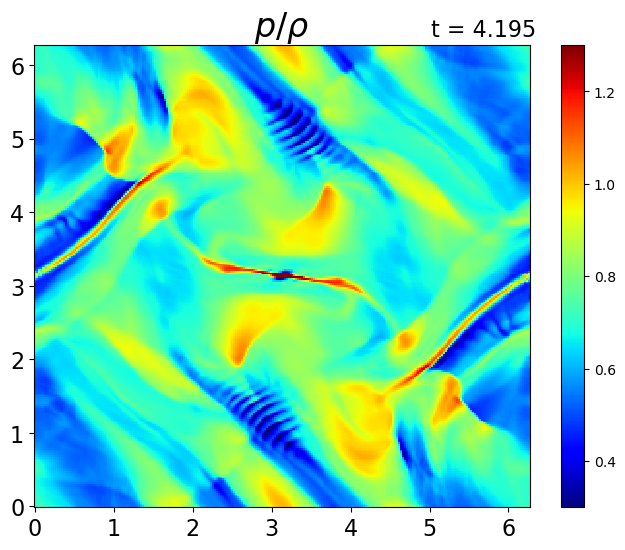

In [24]:
fig = plt.figure(figsize=(8, 6))
ax1 = fig.add_subplot(111)

log = np.loadtxt("log.txt", delimiter=',')
total_steps = int(log[-1][0])
interval = 10
for step in range(0, total_steps+interval, interval):
    ax1.clear()

    U = np.loadtxt(f"results/orszag_tang_{step}.txt", delimiter=',').reshape(8, nx, ny)
    rho = U[0, :, :]
    u = U[1, :, :] / rho 
    v = U[2, :, :] / rho 
    w = U[3, :, :] / rho 
    Bx = U[4, :, :]
    By = U[5, :, :]
    Bz = U[6, :, :]
    e = U[7, :, :]
    p = (gamma-1) * (e - rho*(u**2+v**2+w**2)/2 - (Bx**2+By**2+Bz**2)/2)
    magnetic_pressure = 1/2 * (Bx**2+By**2+Bz**2)
    pT = p + magnetic_pressure

    #contour = ax1.pcolormesh(X, Y, (rho).T, vmin=2.0, vmax=5.0, cmap='jet')
    #contour = ax1.pcolormesh(X, Y, (magnetic_pressure).T, vmin=0.0, vmax=3.0, cmap='jet')
    contour = ax1.pcolormesh(X, Y, (p/rho).T, vmin=0.3, vmax=1.3, cmap='jet')
    if step == 0:
        cbar = plt.colorbar(contour, ax=ax1)

    ax1.set_title(r"$p/\rho$", fontsize=24)
    ax1.text(0.8, 1.02, f"t = {log[int(step/10)][1]:.3f}", transform=ax1.transAxes, fontsize=16)
    ax1.tick_params(labelsize=16)

    fig.savefig(f"pictures/{step}.png", dpi=200)


filename = "orszag-tang_without_divB_cleaner_p-rho.mp4"
img = cv2.imread(f'./pictures/0.png')
framesize = (img.shape[1], img.shape[0])
fps = 10.0
fourcc = cv2.VideoWriter_fourcc('m','p','4','v')
video  = cv2.VideoWriter(filename=filename, fourcc=fourcc, fps=fps, frameSize=framesize)

for step in range(0, total_steps+interval, interval):
    img = cv2.imread(f'./pictures/{step}.png')
    video.write(img)
video.release()